# Name : Snehal shyam Jagtap


# BASIC STATISTICS

## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset


### Introduction

●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [19]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [20]:
df.shape

(450, 13)

In [21]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [5]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


#### Identify numerical columns in the dataset.

In [7]:

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Output the identified columns
print("Numerical Columns:", numerical_cols)

print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


#### Calculate the mean, median, mode, and standard deviation for these columns.

# Descriptive Statistics for Numerical Columns


In [39]:
mean=df.mean()
mean

C:\Users\sneha\AppData\Local\Temp\ipykernel_25104\80967874.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=df.mean()


Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [40]:
median=df.median()
median

C:\Users\sneha\AppData\Local\Temp\ipykernel_25104\3892995489.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median=df.median()


Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [43]:
mode=df.mode()
mode

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,F01,C,3.0,FMCG,Jeera,Babaji Cream,400.0,24300.0,5.007822,69.177942,326.974801
1,02-04-2021,NaN,F02,NaN,NaN,Lifestyle,NaN,Babaji Oil,450.0,NaN,5.055218,73.025199,330.822058
2,03-04-2021,NaN,F03,NaN,NaN,Mobiles,NaN,Babaji Shampoo,500.0,NaN,5.059801,93.649161,466.350839
3,04-04-2021,NaN,F04,NaN,NaN,NaN,NaN,Gear BB Cream,1300.0,NaN,5.072124,94.682735,485.317265
4,05-04-2021,NaN,F05,NaN,NaN,NaN,NaN,Gear Cream,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [44]:
std=df.std()
std

C:\Users\sneha\AppData\Local\Temp\ipykernel_25104\2791382507.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std=df.std()


Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

### Data Visualization

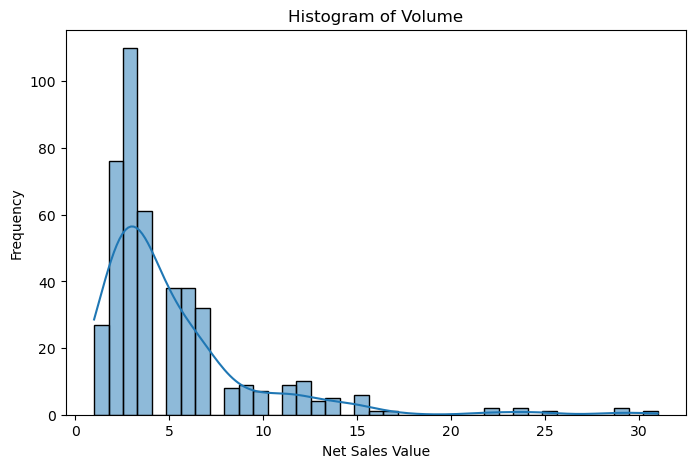

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for Numerical Columns 
plt.figure(figsize=(8, 5))
sns.histplot(df['Volume'], kde=True)
plt.title(f'Histogram of Volume')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()



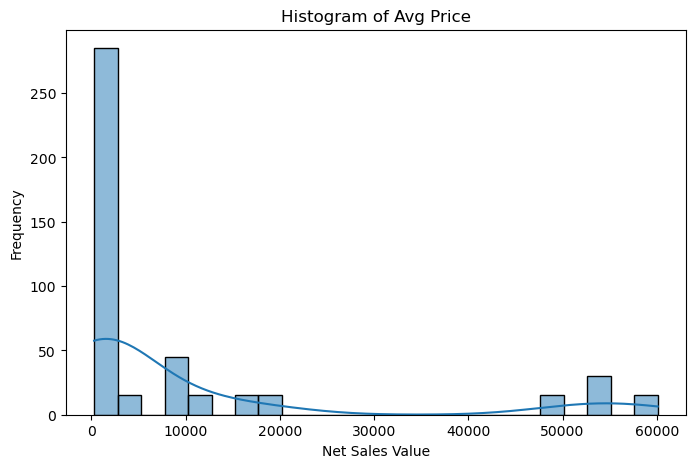

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for Numerical Columns 
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg Price'], kde=True)
plt.title(f'Histogram of Avg Price')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()


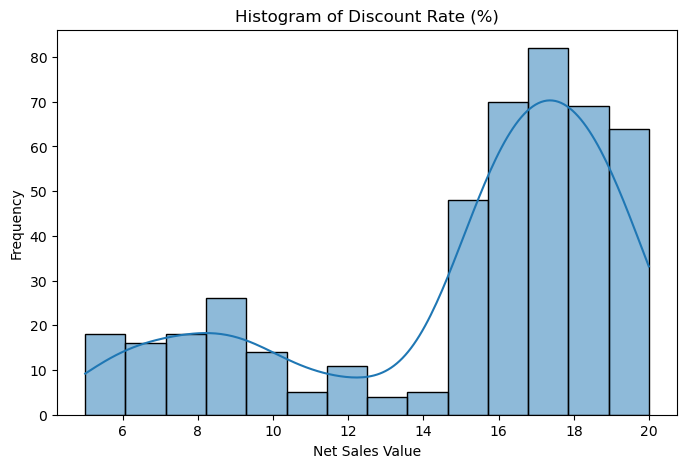

In [53]:
# Histograms for Numerical Columns 
plt.figure(figsize=(8, 5))
sns.histplot(df['Discount Rate (%)'], kde=True)
plt.title(f'Histogram of Discount Rate (%)')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()


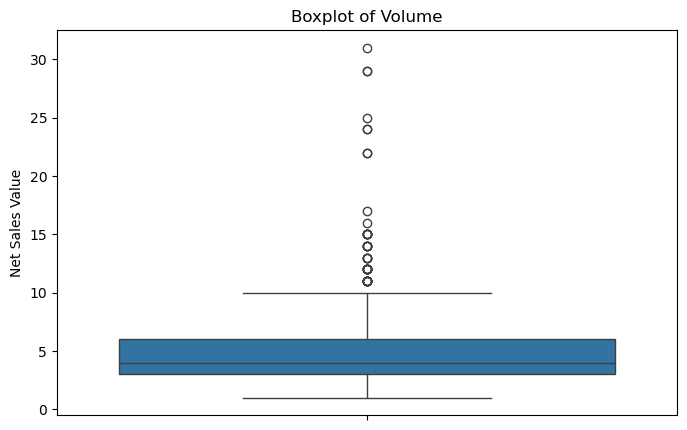

In [58]:
# Boxplots for Numerical Columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Volume'])
plt.title(f'Boxplot of Volume')
plt.ylabel(col)
plt.show()



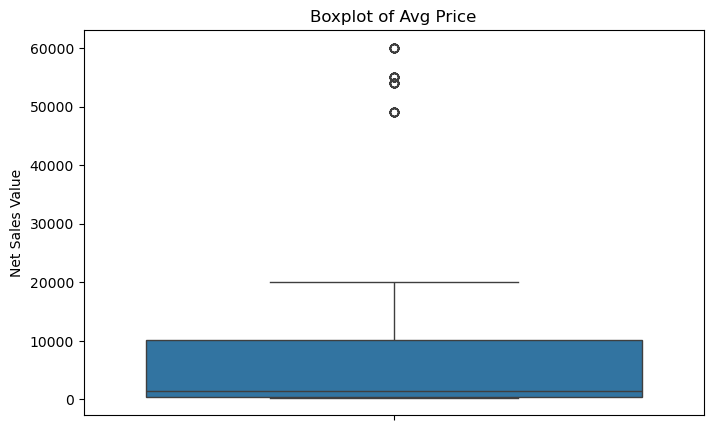

In [59]:
# Boxplots for Numerical Columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Avg Price'])
plt.title(f'Boxplot of Avg Price')
plt.ylabel(col)
plt.show()


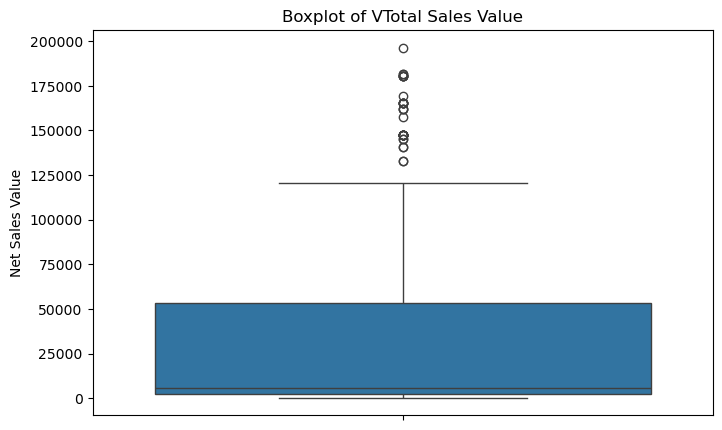

In [60]:
# Boxplots for Numerical Columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Total Sales Value'])
plt.title(f'Boxplot of VTotal Sales Value')
plt.ylabel(col)
plt.show()


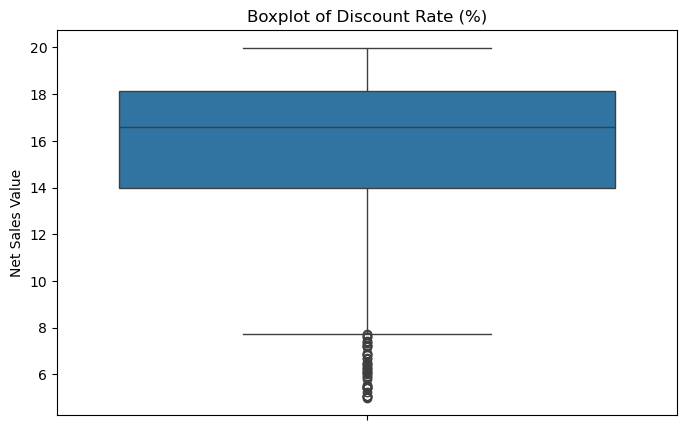

In [61]:
# Boxplots for Numerical Columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Discount Rate (%)'])
plt.title(f'Boxplot of Discount Rate (%)')
plt.ylabel(col)
plt.show()


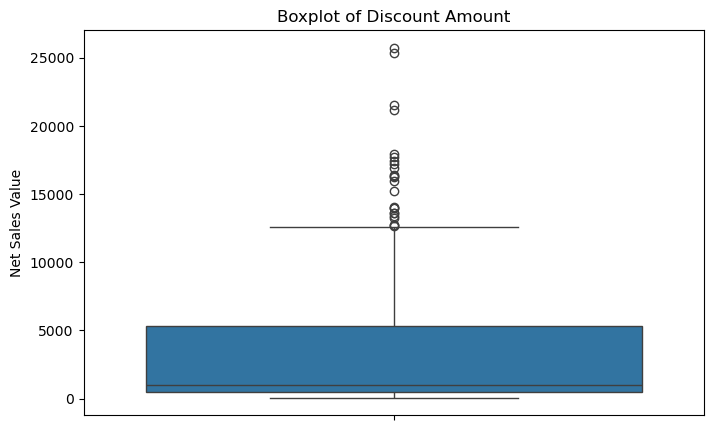

In [62]:
# Boxplots for Numerical Columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Discount Amount'])
plt.title(f'Boxplot of Discount Amount')
plt.ylabel(col)
plt.show()


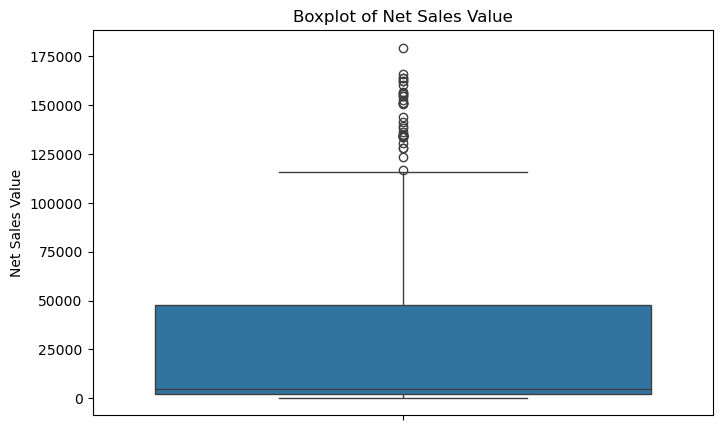

In [63]:
# Boxplots for Numerical Columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Net Sales Value'])
plt.title(f'Boxplot of Net Sales Value')
plt.ylabel(col)
plt.show()

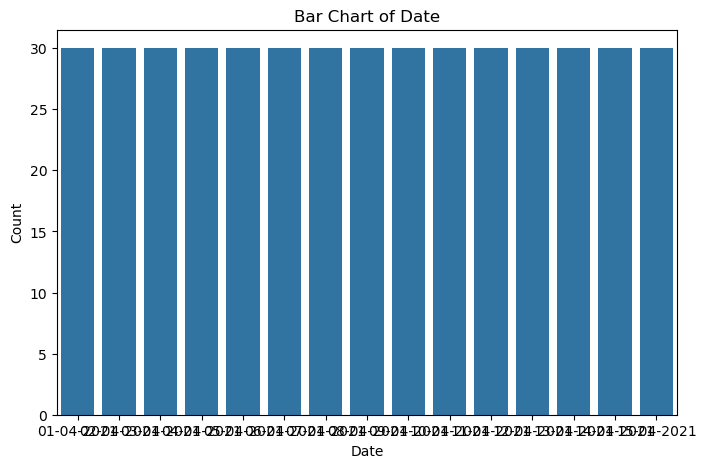

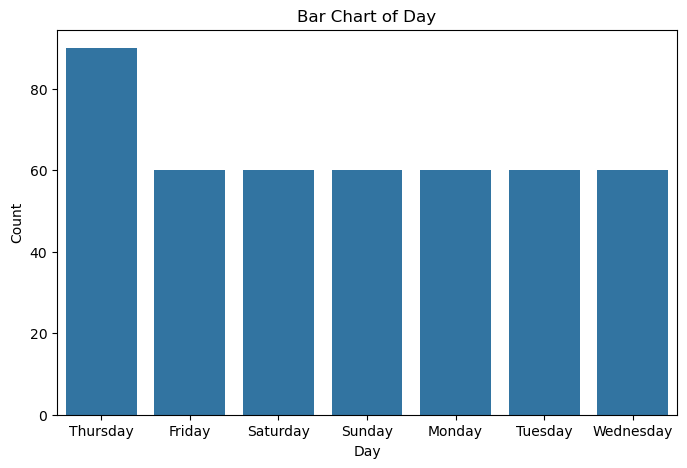

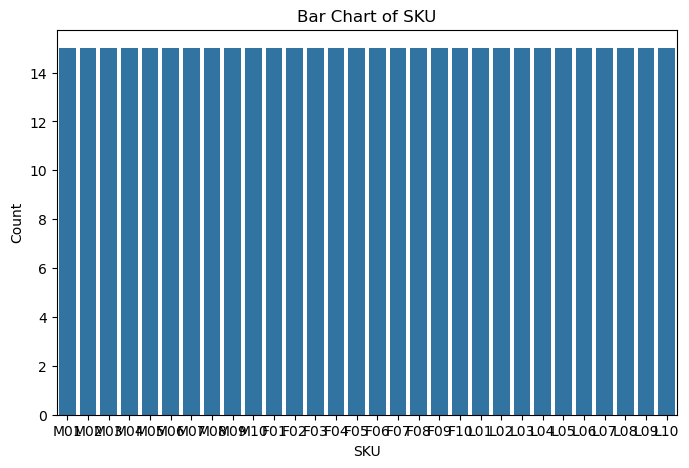

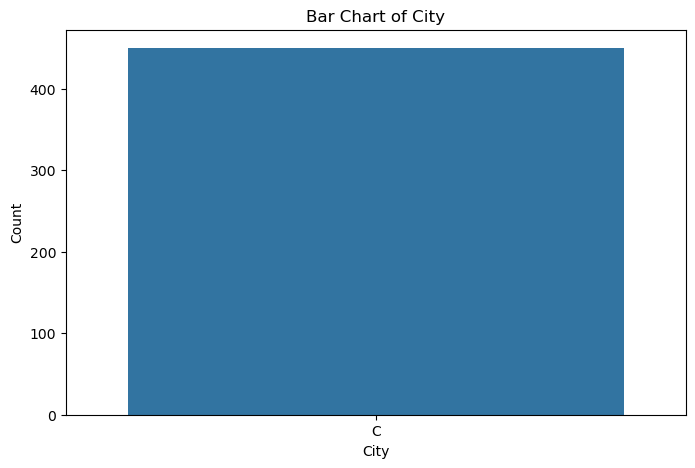

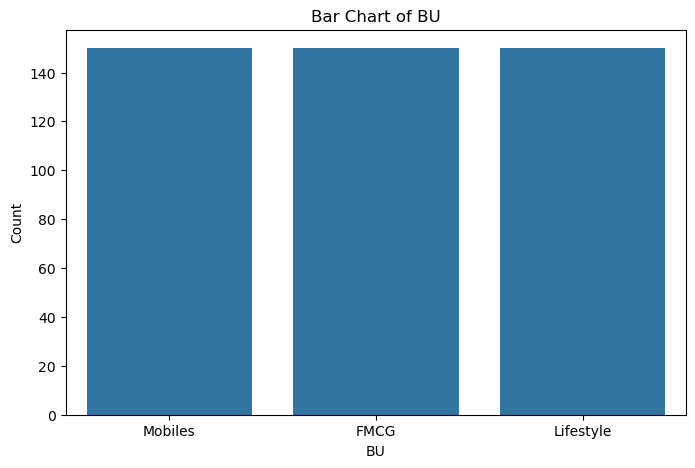

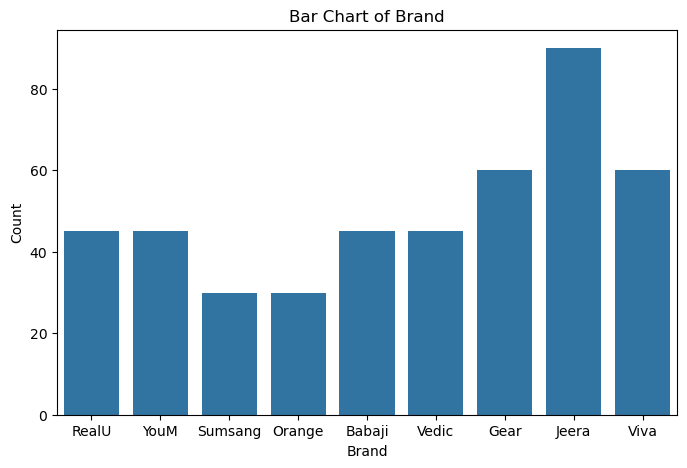

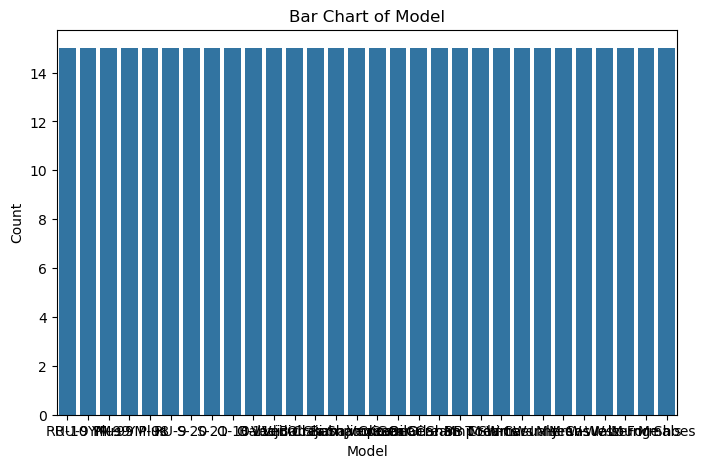

In [65]:
# Bar Chart Analysis for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


####  Standardization of Numerical Variables

In [67]:
# Z-score Standardization
df_standardized = df.copy()
df_standardized[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Displaying statistics before and after standardization
print("\nBefore Standardization:")
print(df[numerical_cols].describe())





Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427 

In [68]:
print("\nAfter Standardization:")
print(df_standardized[numerical_cols].describe())


After Standardization:
             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   4.934325e-17  3.947460e-17       1.184238e-17      -3.552714e-17   
std    1.000000e+00  1.000000e+00       1.000000e+00       1.000000e+00   
min   -9.610229e-01 -5.621398e-01      -6.611811e-01      -2.404259e+00   
25%   -4.883887e-01 -5.524605e-01      -6.156681e-01      -2.819928e-01   
50%   -2.520716e-01 -4.979801e-01      -5.563034e-01       3.370428e-01   
75%    2.205626e-01 -1.954841e-02       3.836378e-01       7.011977e-01   
max    6.128490e+00  2.745953e+00       3.217313e+00       1.146084e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.921189e-17     3.947460e-18  
std       1.000000e+00     1.000000e+00  
min      -7.266945e-01    -6.501345e-01  
25%      -6.399340e-01    -6.096839e-01  
50%      -5.227531e-01    -5.562833e-01  
75%   

#### Conversion of Categorical Data into Dummy Variables (One-Hot Encoding)

In [70]:
# One-Hot Encoding of Categorical Columns
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols, drop_first=True)




In [71]:
# Displaying a portion of the transformed dataset
print("\nTransformed Dataset (First 5 rows):")
print(df_encoded.head())


Transformed Dataset (First 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.801638                0                0                0   
1         1.269613                0                0                0   
2         1.543957                0                0                0   
3         1.763847                0                0                0   
4        -0.227342                0                0                0   

   Date_05-04-2021  ...  Model_Vedic 

#### Save the Transformed Dataset

In [74]:
# Save the transformed dataset to a new CSV file
df_encoded.to_csv('transformed_sales_data_with_discounts.csv', index=False)


### Conclusion : 
 ####  using the one-hot encoding  we transformed the data 

# THE END